In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

In [2]:
sns.set()

df = pd.read_csv("../../data/SERIA_MA_train.csv")
df_test = pd.read_csv("../../data/SERIA_MA_test.csv")

In [3]:
df_train = df.copy()
df_train["Date"] = pd.to_datetime(df_train["Date"], format="%d/%m/%Y")
df_train['day'] = pd.DatetimeIndex(df_train["Date"]).day
df_train['day of week'] = pd.DatetimeIndex(df_train["Date"]).dayofweek
df_train['day of week'] = df_train['day of week'].astype(str)
df_train['day of week'] = df_train['day of week'].replace([str(0),str(1),str(2),str(3),str(4), str(5), str(6)],['MON','TUE','WED','THU','FRI','SAT', 'SUN'])
df_train['month'] = pd.DatetimeIndex(df_train["Date"]).month
df_train['year'] = pd.DatetimeIndex(df_train["Date"]).year
df_train = df_train.set_index('Date')
df_train.head()

,Value,day,day of week,month,year
Date,,,,,
1966-01-01,298,1,SAT,1,1966
1966-01-02,299,2,SUN,1,1966
1966-01-03,297,3,MON,1,1966
1966-01-04,313,4,TUE,1,1966
1966-01-05,346,5,WED,1,1966


In [4]:
df_train_week = df.copy()
df_train_week["Date"] = pd.to_datetime(df_train_week["Date"])
df_train_week = df_train_week.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Value'].mean().reset_index()
df_train_week['month'] = pd.DatetimeIndex(df_train_week["Date"]).month
df_train_week['year'] = pd.DatetimeIndex(df_train_week["Date"]).year
df_train_week = df_train_week.set_index('Date')
df_train_week.head()

,Value,month,year
Date,,,
1966-01-02,427.000000,1,1966
1966-01-09,373.571429,1,1966
1966-01-16,598.000000,1,1966
1966-01-23,507.000000,1,1966
1966-01-30,411.428571,1,1966


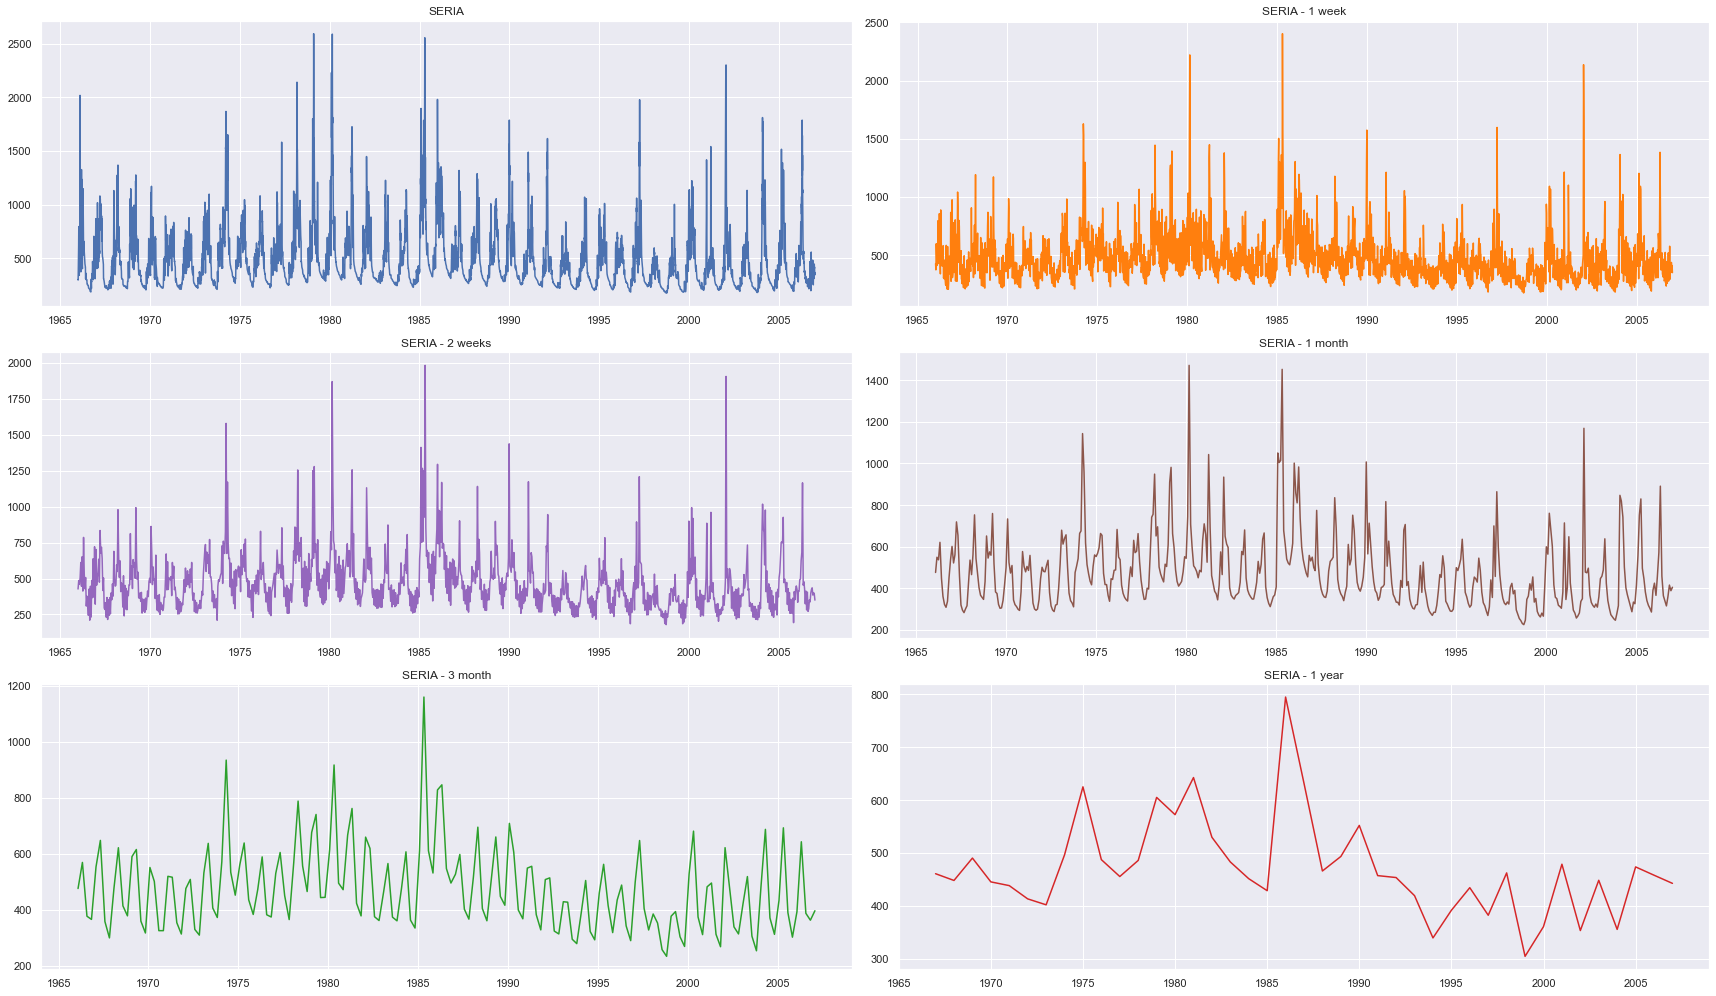

In [5]:
#2 weeks table
df_train_2_week = df.copy()
df_train_2_week["Date"] = pd.to_datetime(df_train_2_week["Date"])
df_train_2_week = df_train_2_week.groupby([pd.Grouper(key='Date', freq='2W-SUN')])['Value'].mean().reset_index()
df_train_2_week = df_train_2_week.set_index('Date')

#month table
df_train_month = df.copy()
df_train_month["Date"] = pd.to_datetime(df_train_month["Date"])
df_train_month = df_train_month.groupby([pd.Grouper(key='Date', freq='M')])['Value'].mean().reset_index()
df_train_month = df_train_month.set_index('Date')

#3 month table
df_train_3_month = df.copy()
df_train_3_month["Date"] = pd.to_datetime(df_train_3_month["Date"])
df_train_3_month = df_train_3_month.groupby([pd.Grouper(key='Date', freq='3M')])['Value'].mean().reset_index()
df_train_3_month = df_train_3_month.set_index('Date')

#year table
df_train_year = df.copy()
df_train_year["Date"] = pd.to_datetime(df_train_year["Date"])
df_train_year = df_train_year.groupby([pd.Grouper(key='Date', freq='Y')])['Value'].mean().reset_index()
df_train_year = df_train_year.set_index('Date')


#Printing the tables
fig, axs = plt.subplots(3, 2, figsize=(24, 14))
axs[0, 0].plot(df_train.Value)
axs[0, 0].set_title('SERIA')
axs[0, 1].plot(df_train_week.Value, 'tab:orange')
axs[0, 1].set_title('SERIA - 1 week')
axs[1, 0].plot(df_train_2_week.Value, 'tab:purple')
axs[1, 0].set_title('SERIA - 2 weeks')
axs[1, 1].plot(df_train_month.Value, 'tab:brown')
axs[1, 1].set_title('SERIA - 1 month')
axs[2, 0].plot(df_train_3_month.Value, 'tab:green')
axs[2, 0].set_title('SERIA - 3 month')
axs[2, 1].plot(df_train_year.Value, 'tab:red')
axs[2, 1].set_title('SERIA - 1 year')
fig.tight_layout()

Text(0, 0.5, 'Value')

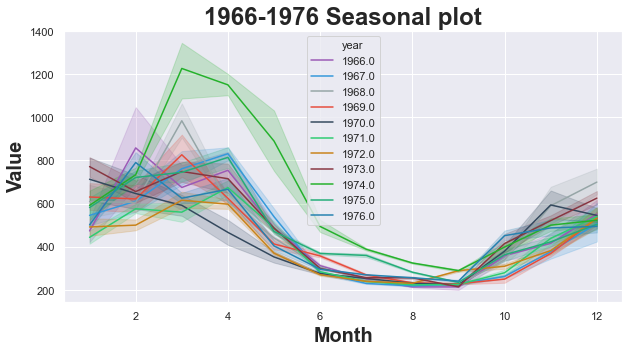

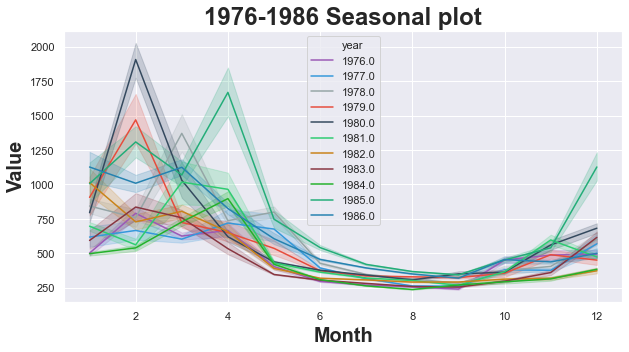

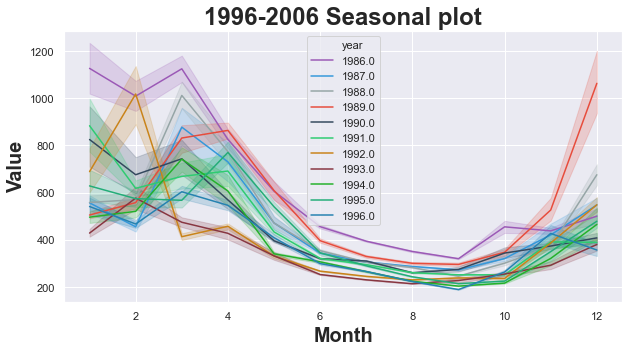

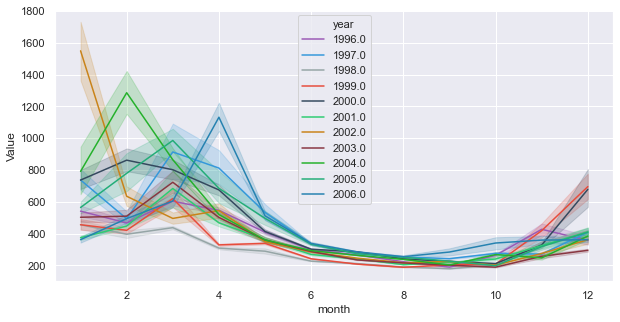

In [17]:
#Printing 1966-1976 Seasonal plot
fig, ax = plt.subplots(figsize=(10, 5))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#c98319","#883641",'#24b12b','#23ad78', '#2582b0']
palette = sns.color_palette(flatui, 11)
sns.lineplot(df_train['month'], df_train['Value'], hue=df_train['year']['1966':'1976'], palette=palette)
ax.set_title('1966-1976 Seasonal plot', fontsize = 24, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 20, fontdict=dict(weight='bold'))
ax.set_ylabel('Value', fontsize = 20, fontdict=dict(weight='bold')) 

#Printing 1976-1986 Seasonal plot
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.lineplot(df_train['month'], df_train['Value'], hue=df_train['year']['1976':'1986'], palette=palette)
ax1.set_title('1976-1986 Seasonal plot', fontsize = 24, loc='center', fontdict=dict(weight='bold'))
ax1.set_xlabel('Month', fontsize = 20, fontdict=dict(weight='bold'))
ax1.set_ylabel('Value', fontsize = 20, fontdict=dict(weight='bold')) 

#Printing 1986-1996 Seasonal plot
fig, ax2 = plt.subplots(figsize=(10, 5))
palette = sns.color_palette(flatui, 11)
sns.lineplot(df_train['month'], df_train['Value'], hue=df_train['year']['1986':'1996'], palette=palette)
ax2.set_title('1986-1996 Seasonal plot', fontsize = 24, loc='center', fontdict=dict(weight='bold'))
ax2.set_xlabel('Month', fontsize = 20, fontdict=dict(weight='bold'))
ax2.set_ylabel('Value', fontsize = 20, fontdict=dict(weight='bold'))

#Printing 1996-2006 Seasonal plot
fig, ax3 = plt.subplots(figsize=(10, 5))
palette = sns.color_palette(flatui, 11)
sns.lineplot(df_train['month'], df_train['Value'], hue=df_train['year']['1996':'2006'], palette=palette)
ax2.set_title('1996-2006 Seasonal plot', fontsize = 24, loc='center', fontdict=dict(weight='bold'))
ax2.set_xlabel('Month', fontsize = 20, fontdict=dict(weight='bold'))
ax2.set_ylabel('Value', fontsize = 20, fontdict=dict(weight='bold'))

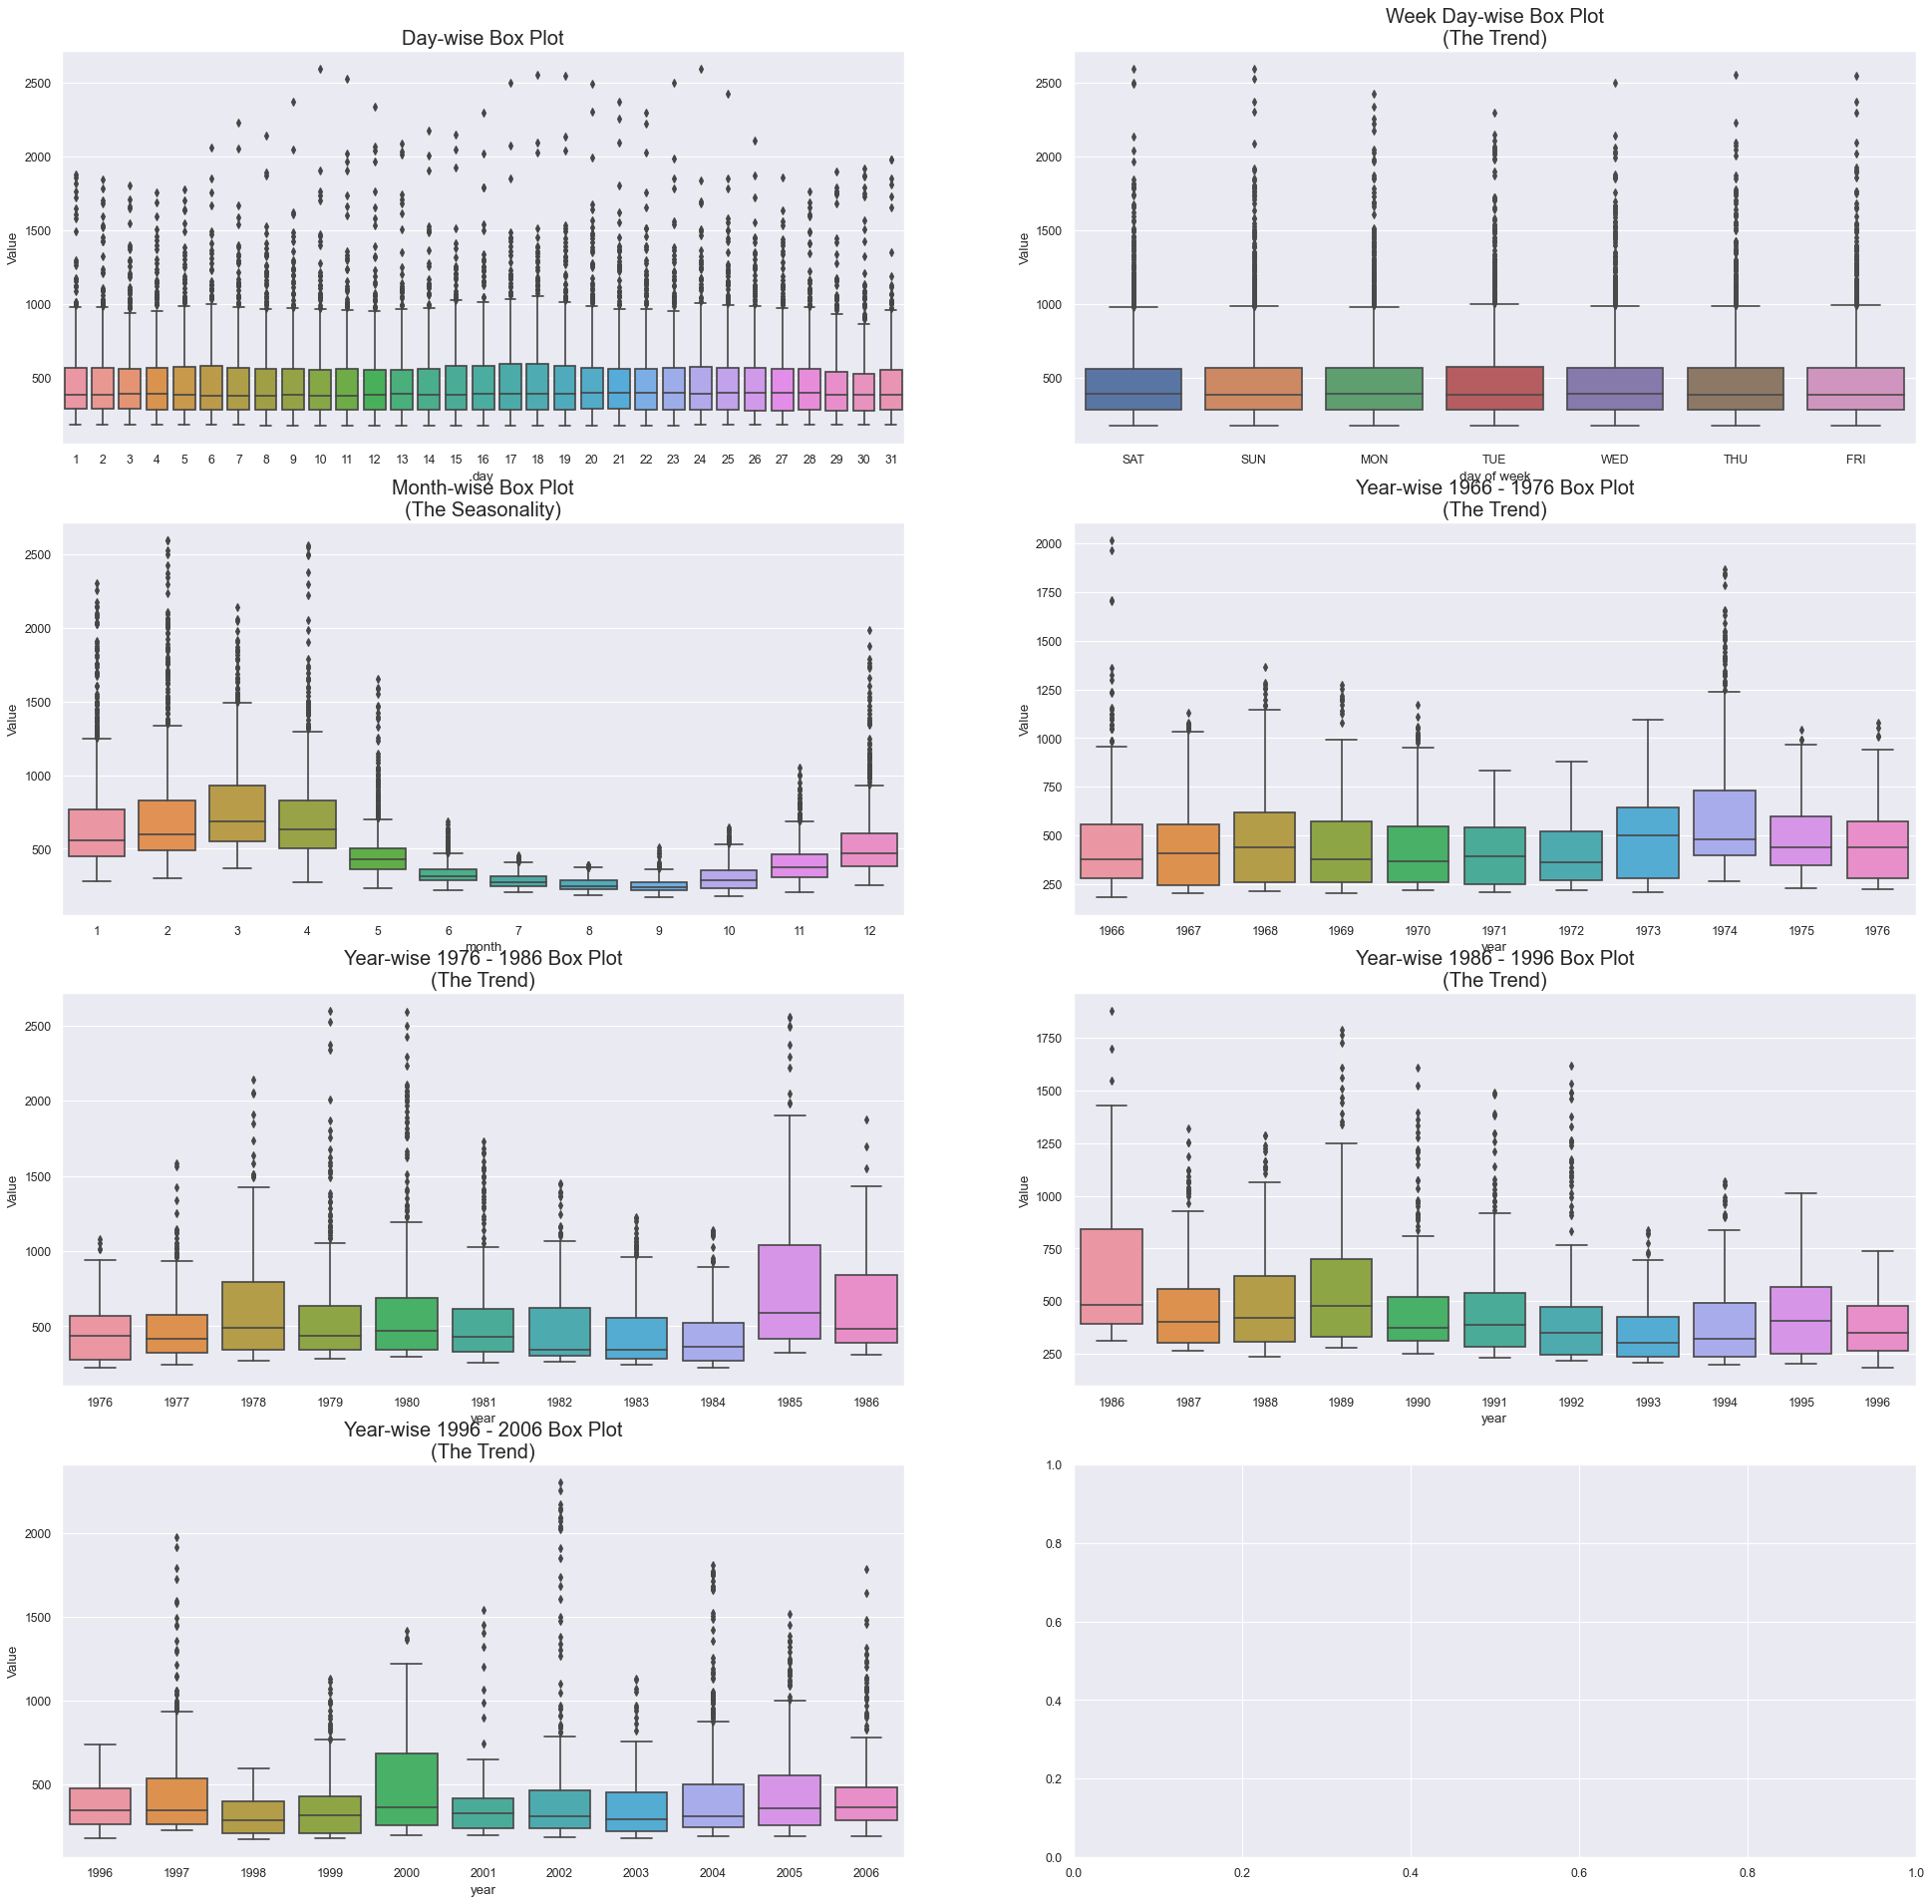

In [24]:
# Draw Plot
fig, axes = plt.subplots(4, 2, figsize=(30,30), dpi= 80)
sns.boxplot(x='day', y='Value', data=df_train, ax=axes[0,0])
sns.boxplot(x='day of week', y='Value', data=df_train, ax=axes[0,1])
sns.boxplot(x='month', y='Value', data=df_train, ax=axes[1,0])
sns.boxplot(x='year', y='Value', data=df_train['1966':'1976'], ax=axes[1,1])
sns.boxplot(x='year', y='Value', data=df_train['1976':'1986'], ax=axes[2,0])
sns.boxplot(x='year', y='Value', data=df_train['1986':'1996'], ax=axes[2,1])
sns.boxplot(x='year', y='Value', data=df_train['1996':'2006'], ax=axes[3,0])


# Set Title
axes[0,0].set_title('Day-wise Box Plot', fontsize=18);
axes[0,1].set_title('Week Day-wise Box Plot\n(The Trend)', fontsize=18);
axes[1,0].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
axes[1,1].set_title('Year-wise 1966 - 1976 Box Plot\n(The Trend)', fontsize=18);
axes[2,0].set_title('Year-wise 1976 - 1986 Box Plot\n(The Trend)', fontsize=18);
axes[2,1].set_title('Year-wise 1986 - 1996 Box Plot\n(The Trend)', fontsize=18);
axes[3,0].set_title('Year-wise 1996 - 2006 Box Plot\n(The Trend)', fontsize=18);

plt.show()

In [19]:
# ADF Test
result = adfuller(df_train.Value.values, autolag='aic')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_train.Value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.027007507116544
p-value: 1.622035460464973e-17
Critial Values:
   1%, -3.430787955294528
Critial Values:
   5%, -2.8617335572313958
Critial Values:
   10%, -2.5668730258533734

KPSS Statistic: 1.037774
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


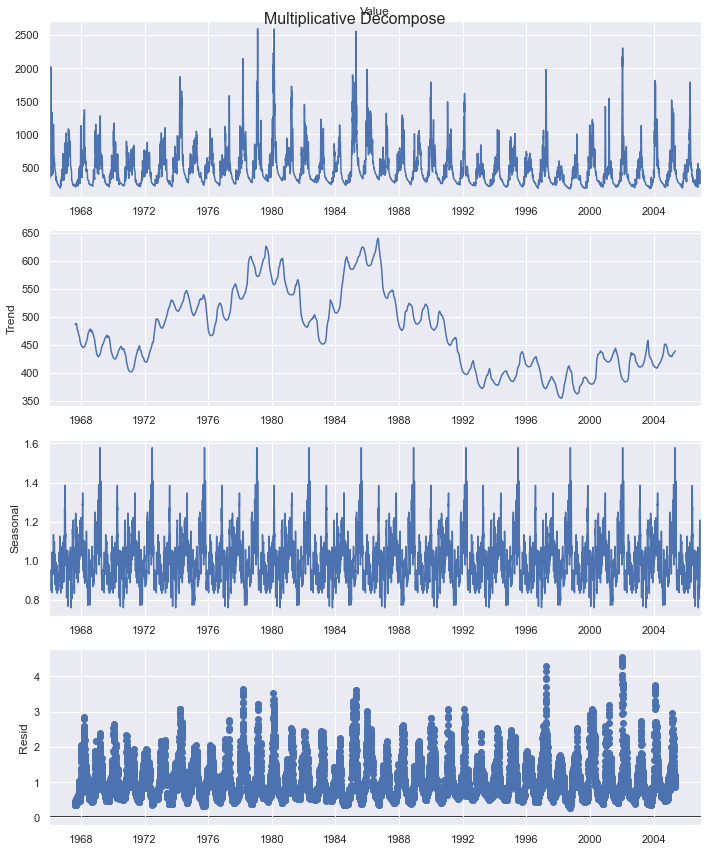

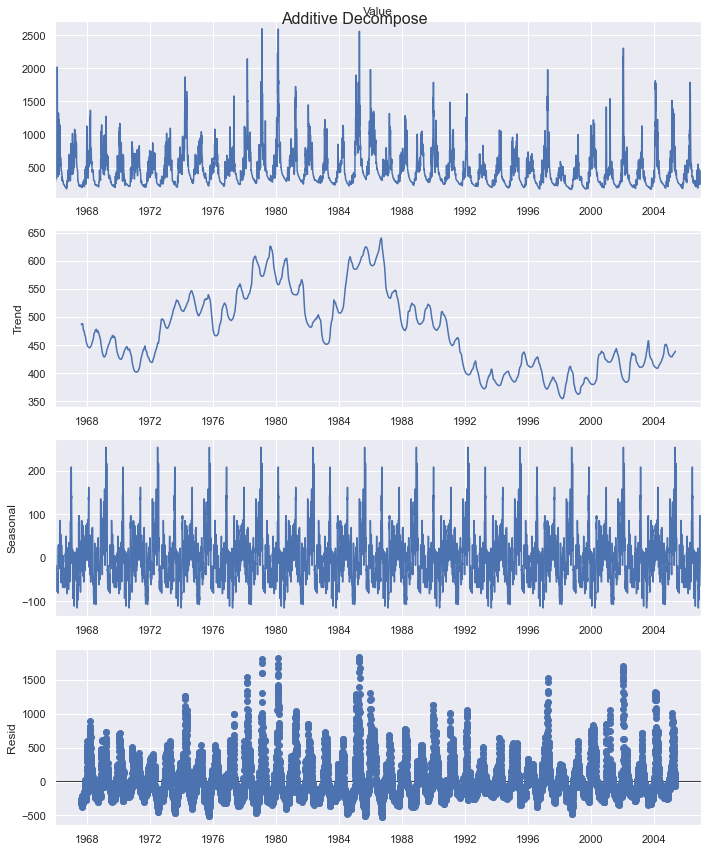

In [31]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_train['Value'], model='multiplicative', period = 1200)

# Additive Decomposition
result_add = seasonal_decompose(df_train['Value'], model='additive', period = 1200)

# Plot
plt.rcParams.update({'figure.figsize': (10,12)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16)
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

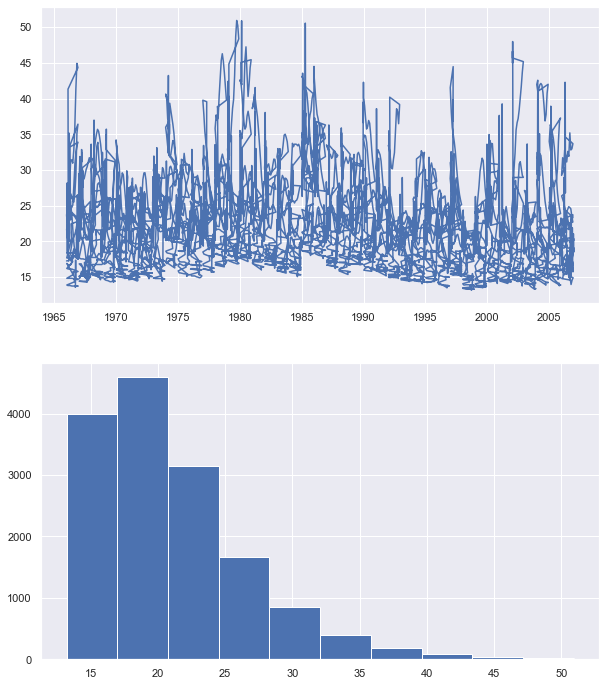

In [32]:
df_train_boxcox_sqr = df.copy()
df_train_boxcox_sqr["Date"] = pd.to_datetime(df_train_boxcox_sqr["Date"])
df_train_boxcox_sqr = df_train_boxcox_sqr.set_index('Date')
df_train_boxcox_sqr.columns = ['Value']
df_train_boxcox_sqr['Value'] = np.sqrt(df_train_boxcox_sqr['Value'])
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(df_train_boxcox_sqr['Value'])
# histogram
plt.subplot(212)
plt.hist(df_train_boxcox_sqr['Value'])
plt.show()


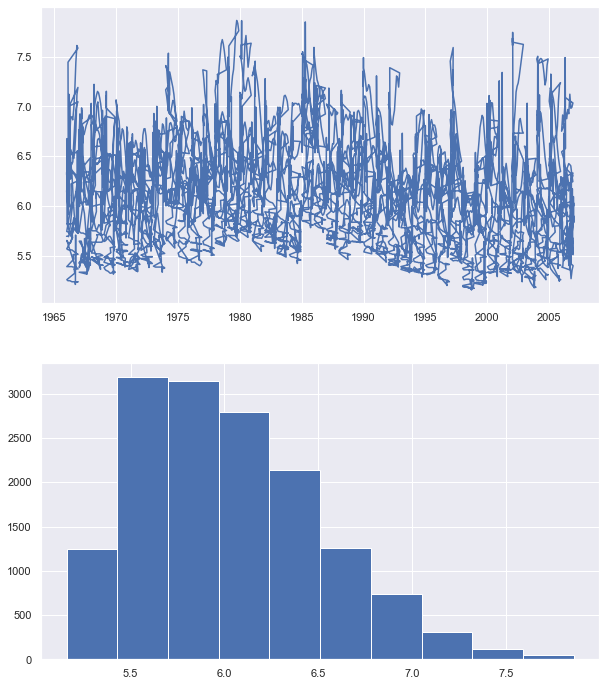

In [33]:
df_train_boxcox_log = df.copy()
df_train_boxcox_log["Date"] = pd.to_datetime(df_train_boxcox_log["Date"])
df_train_boxcox_log = df_train_boxcox_log.set_index('Date')
df_train_boxcox_log.columns = ['Value']
df_train_boxcox_log['Value'] = np.log(df_train_boxcox_log['Value'])
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(df_train_boxcox_log['Value'])
# histogram
plt.subplot(212)
plt.hist(df_train_boxcox_log['Value'])
plt.show()

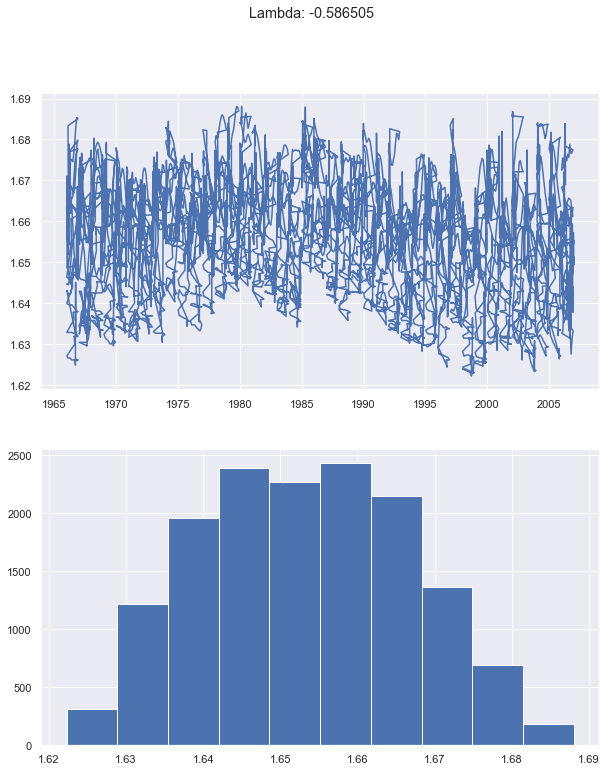

In [34]:
df_train_boxcox = df.copy()
df_train_boxcox["Date"] = pd.to_datetime(df_train_boxcox["Date"])
df_train_boxcox = df_train_boxcox.set_index('Date')
df_train_boxcox.columns = ['Value']
df_train_boxcox['Value'], lam = boxcox(df_train_boxcox['Value'])
plt.figure(1)
plt.suptitle('Lambda: %f' % lam)
# line plot
plt.subplot(211)
plt.plot(df_train_boxcox['Value'])
# histogram
plt.subplot(212)
plt.hist(df_train_boxcox['Value'])
plt.show()

